In [99]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9273,5,140.25,4,282.0,4,213.500000,0.0,0.009091,0.000000,0.0,Nov,3,2,1,2,New_Visitor,False,True
8328,5,60.50,0,0.0,5,50.000000,0.0,0.025000,0.000000,0.0,Dec,8,13,9,20,Other,True,True
1780,3,79.00,0,0.0,36,2517.000000,0.0,0.005405,27.238662,0.0,Mar,2,10,2,2,Returning_Visitor,True,True
8026,9,441.85,0,0.0,122,2577.449603,0.0,0.010463,75.277129,0.0,Nov,1,1,1,2,Returning_Visitor,False,True
6467,9,236.80,0,0.0,240,5523.926505,0.0,0.001197,20.623871,0.0,Oct,2,5,4,20,Returning_Visitor,False,True


In [144]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Importing the dataset
dataset = pd.read_csv("online_shoppers_intention.csv", header = 0)

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
column_trans = make_column_transformer((OneHotEncoder(),['Month','OperatingSystems','Browser','VisitorType','Weekend']),remainder='passthrough')

#Downsampling
from sklearn.utils import resample
dataset['Revenue'].value_counts()
#Purchased
dataset_p = dataset[dataset.Revenue==True]

### Checking the correlation between Revenue and all other features

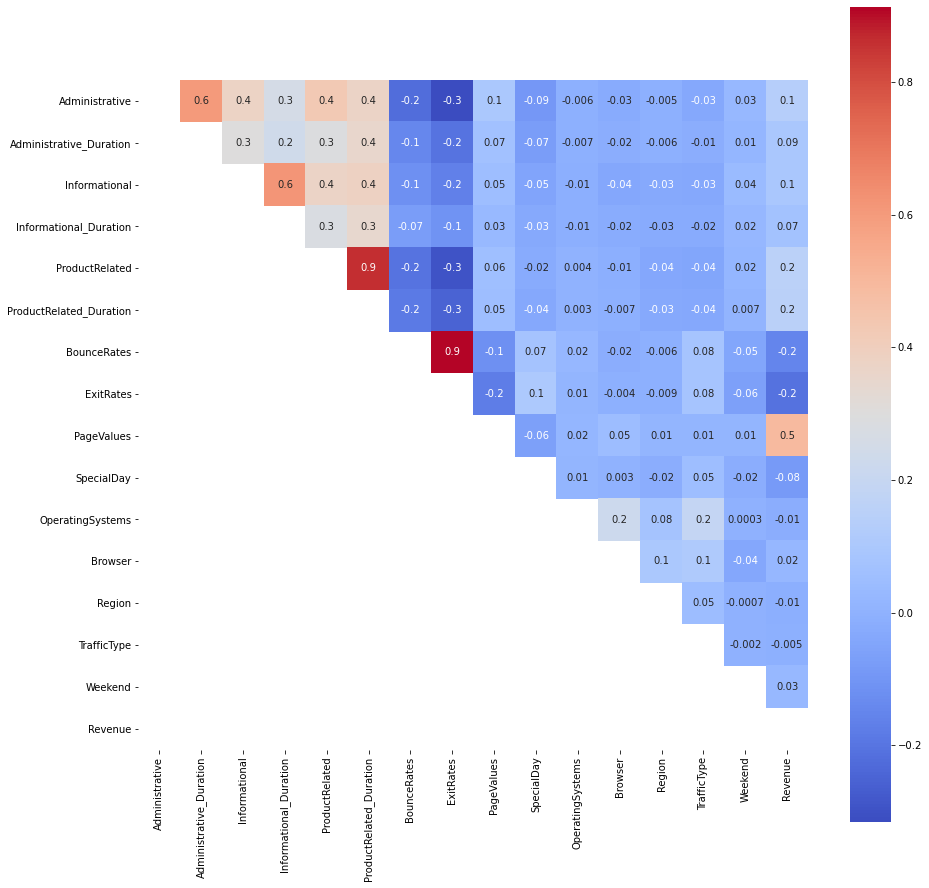

In [108]:
plt.subplots(figsize=(15,15))
matrix = np.tril(dataset.corr())
sns.heatmap(dataset.corr(), annot = True, fmt='.1g', cmap= 'coolwarm',square=True,mask = matrix)

### Uni-variate Analysis

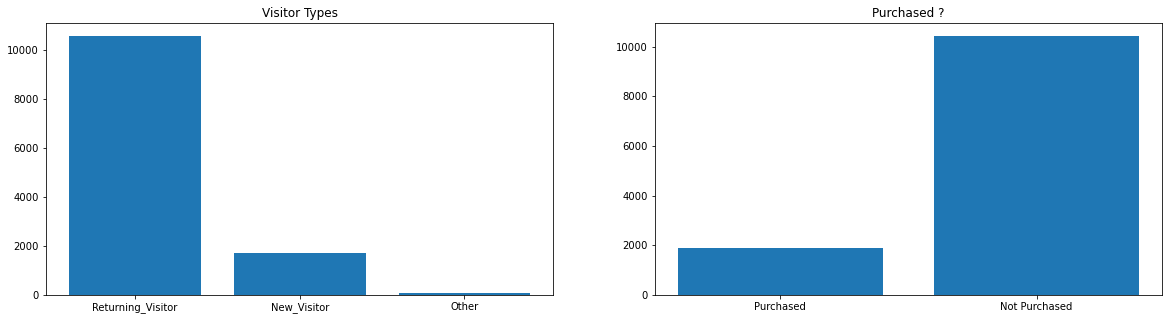

In [109]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(20,5)

#Visitor Types
axs[0].set_title("Visitor Types")
Vtype = ['Returning_Visitor','New_Visitor','Other']
count_vtype = [dataset['VisitorType'].value_counts()['Returning_Visitor'],dataset['VisitorType'].value_counts()['New_Visitor'],dataset['VisitorType'].value_counts()['Other']]
axs[0].bar(Vtype,count_vtype)

#Number of Purchased
axs[1].set_title("Purchase ?")
TF = ["Purchase","No Purchase"]
TF_count = [dataset['Revenue'].value_counts()[True],dataset['Revenue'].value_counts()[False]]
axs[1].bar(TF,TF_count)

plt.show()

Text(0.5, 1.0, 'Number of purchases each month')

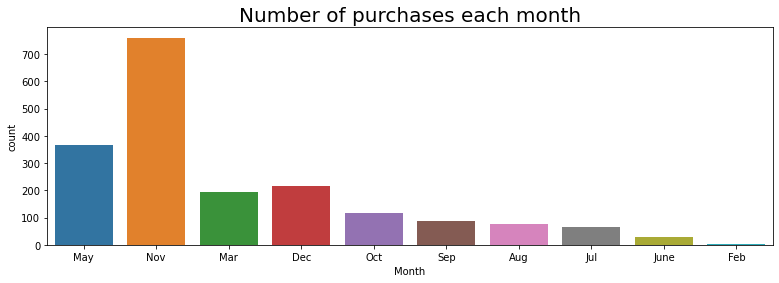

In [112]:
plt.figure(figsize=(13, 4))
sns.countplot(dataset_p.Month.dropna(), order = dataset.Month.value_counts().index);
plt.title('Number of purchases each month', fontsize = 20)

Text(0.5, 1.0, 'Number of non purchases each month')

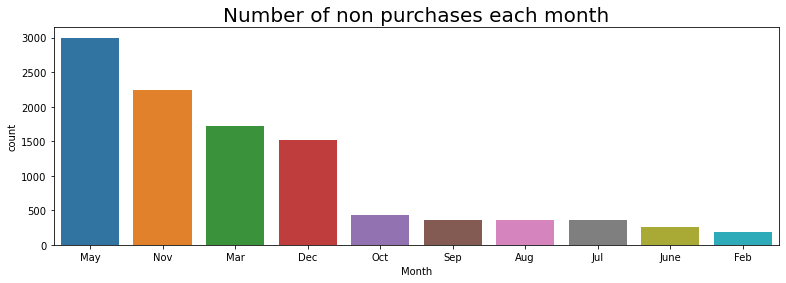

In [113]:
plt.figure(figsize=(13, 4))
sns.countplot(dataset_np.Month.dropna(), order = dataset.Month.value_counts().index);
plt.title('Number of non purchases each month', fontsize = 20)

### Bi-variate Analysis

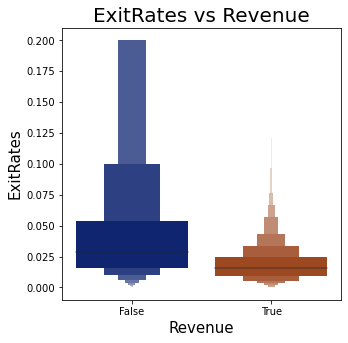

In [142]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (5, 5)
# exit rate vs raevenue
sns.boxenplot(dataset['Revenue'], dataset['ExitRates'], palette = 'dark')
plt.title('ExitRates vs Revenue', fontsize = 20)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('ExitRates', fontsize = 15)

plt.show()

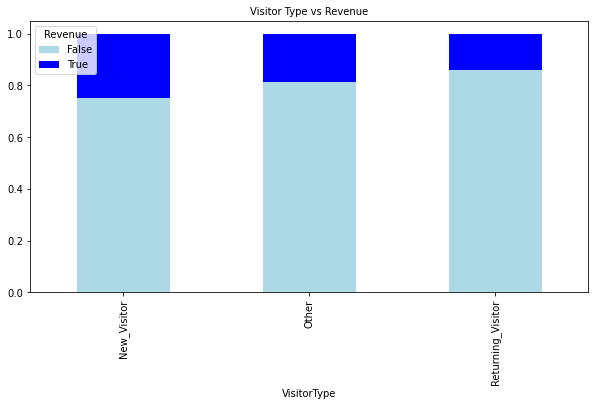

In [124]:
df = pd.crosstab(dataset['VisitorType'], dataset['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5), color = ['lightblue', 'blue'])
plt.title('Visitor Type vs Revenue', fontsize = 10)
plt.show()

### Multi-variente analysis

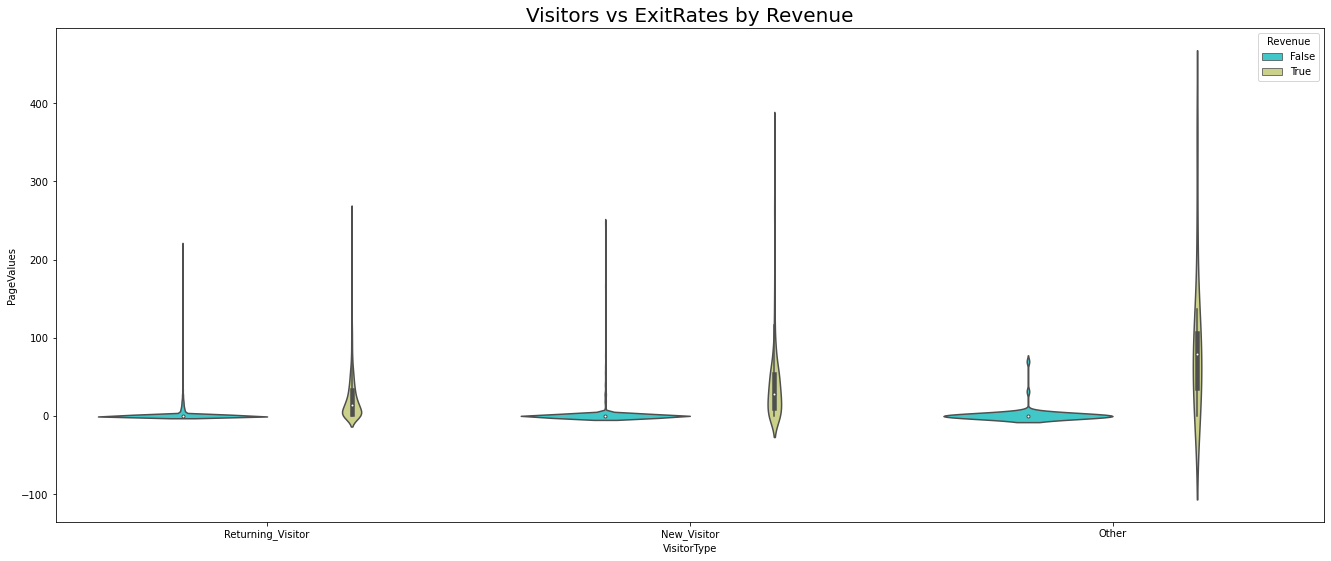

In [143]:
data = dataset
plt.rcParams['figure.figsize'] = (50, 20)
plt.subplot(2, 2, 1)
sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates by Revenue', fontsize = 20)

plt.show()